# Example from La Palma
- This notebook shows how to convert the Raman-based FI densities from Dayton et al. (2023) into pressures and depths in the crust
- This assumes +-50K error in entrapment temperature, and an error in CO$_2$ density of 0.002925 g/cm3
- Depth is calculated using a 2-step density profile, with 2.8 g/cm3 above the Moho, and 3.1 g/cm3 below
- Get the data here!
- https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/Example5_FI_density_to_depth/Dayton_et_al_2023_LaPalma_Example.xlsx

### Install DiadFit if you havent already! You might also have to install CoolProp if you want to use Span and Wagner EOS - the error message will give you instructions, else reach out

In [1]:
#!pip install --upgrade DiadFit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.77'

## Lets load in the data

In [3]:
data=pd.read_excel('Dayton_et_al_2023_LaPalma_Example.xlsx',
                   sheet_name='Sheet1')
data.head()

,SAMPLE,FileName,Density (g/cm^3),Comment (EPMA Data Point),Na2O,MgO,SiO2,Al2O3,P2O5,K2O,CaO,TiO2,FeO,MnO,Cr2O3,NiO,Total,Fo
0,0,03 LM0 G1 FI1,0.875343,LM0_G1_RIM,0.009036,42.12351,39.90642,0.018331,0.000023,0.005965,0.213926,0.034901,17.91823,0.292019,0.078602,0.190220,100.7912,0.807341
1,0,06 LM0 G2 FI1,0.780430,LM0_G2_CENTER,0.009698,44.42279,39.70696,0.008494,0.000023,0.000412,0.322745,0.022287,15.26419,0.225410,0.018465,0.194827,100.1963,0.838388
2,0,17 LM0 G3 FI3,0.936785,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989
3,0,11 LM0 G3 FI1 (CRR),0.928828,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989
4,0,19 LM0 G3 FI4,0.928514,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989


- We can fisualize the range of meausured densities

Text(0, 0.5, '# of meas')

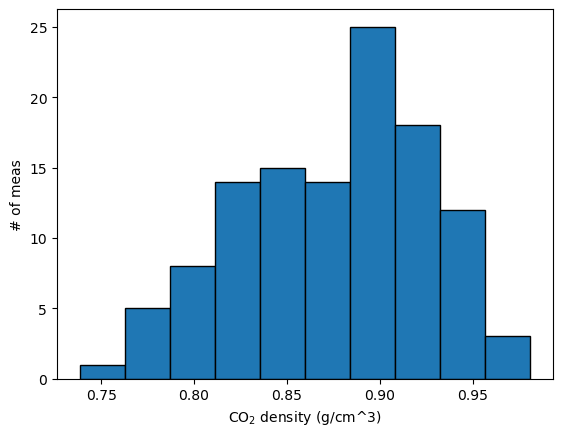

In [4]:
plt.hist(data['Density (g/cm^3)'], ec='k')
plt.xlabel('CO$_2$ density (g/cm^3)')
plt.ylabel('# of meas')

## Now lets propagate uncertainty in each fluid inclusion
- Here we use a temperature of 1150 K, with a +-50 K (i.e. an absolute uncertainty) distributed normally
- We say the error in CO2 density (from repeated Raman measurements) is 0.002925 g/cm3 (i.e. an absolute uncertainty) distributed normally 
- We want to use 2 step crustal density model, with 2800 kg/m3 above 14km depth, and 3100kg/m3 below
- The figure shows us the simulation file the 1st file (file_i=0). For the Nth file, enter file_i=N-1 as python counting starts at 0

working on sample number 0
working on sample number 20
working on sample number 40
working on sample number 60
working on sample number 80
working on sample number 100


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,03 LM0 G1 FI1,0.875343,21.140399,6.016987,6.002942,6.003451,0.222044,21.094215,21.095888,0.730144,50,0.002925,0.0,1423.15,0.875343,two-step,None,SW96
1,06 LM0 G2 FI1,0.780430,16.834446,4.707503,4.707176,4.705732,0.182414,16.833368,16.828621,0.599828,50,0.002925,0.0,1423.15,0.780430,two-step,None,SW96
2,17 LM0 G3 FI3,0.936785,24.412263,7.011993,7.025897,7.023184,0.245340,24.457983,24.449060,0.806748,50,0.002925,0.0,1423.15,0.936785,two-step,None,SW96
3,11 LM0 G3 FI1 (CRR),0.928828,23.965558,6.876146,6.870288,6.862015,0.243510,23.946297,23.919093,0.800729,50,0.002925,0.0,1423.15,0.928828,two-step,None,SW96
4,19 LM0 G3 FI4,0.928514,23.948123,6.870844,6.863665,6.869701,0.255357,23.924517,23.944365,0.839687,50,0.002925,0.0,1423.15,0.928514,two-step,None,SW96


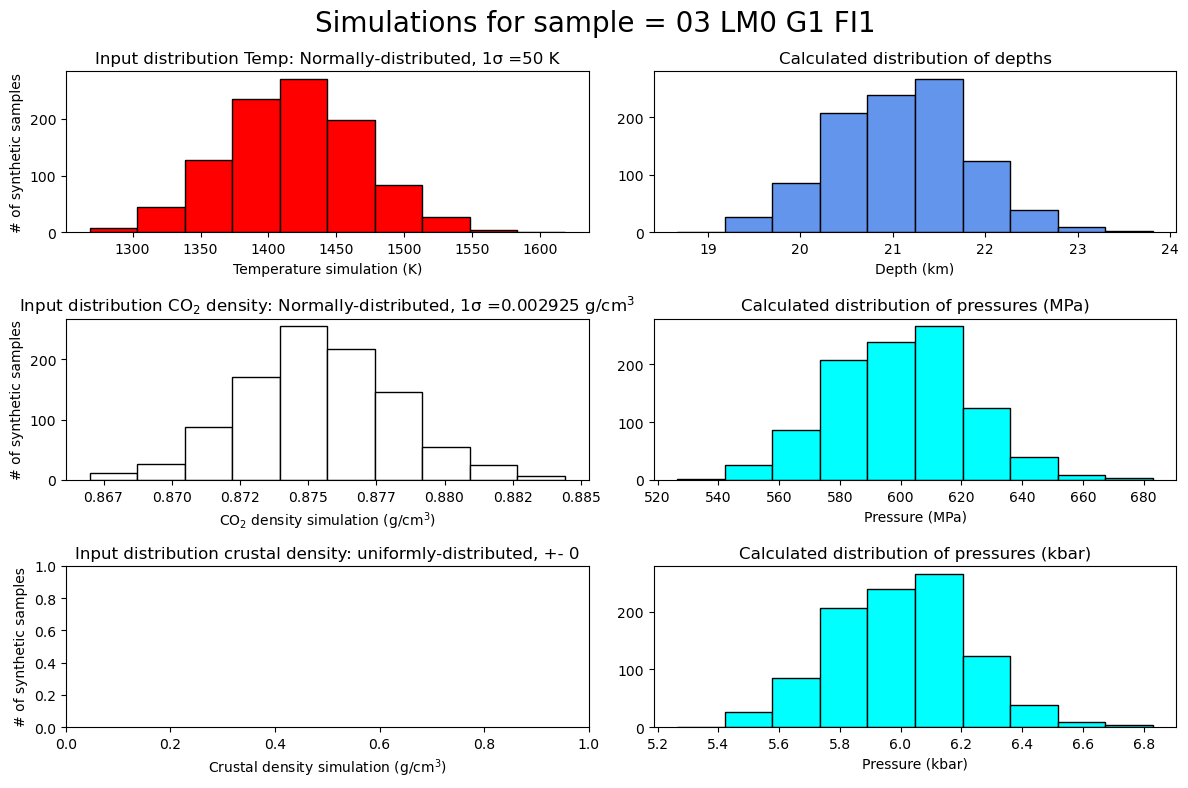

In [5]:
MC_Av, MC_All, fig=pf.propagate_FI_uncertainty(
T_K=1150+273.15,
error_T_K=50, 
error_type_T_K='Abs', 
error_dist_T_K='normal',
CO2_dens_gcm3=data['Density (g/cm^3)'],
error_CO2_dens=0.002925, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
sample_ID=data['FileName'],
model='two-step', d1=14, rho1=2800, rho2=3100,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av.head()

In [6]:
# This returns 2 dataframes, one showing the mean and standard deviation of the simulation for each fluid inclusion
MC_Av.head()

,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,03 LM0 G1 FI1,0.875343,21.140399,6.016987,6.002942,6.003451,0.222044,21.094215,21.095888,0.730144,50,0.002925,0.0,1423.15,0.875343,two-step,None,SW96
1,06 LM0 G2 FI1,0.780430,16.834446,4.707503,4.707176,4.705732,0.182414,16.833368,16.828621,0.599828,50,0.002925,0.0,1423.15,0.780430,two-step,None,SW96
2,17 LM0 G3 FI3,0.936785,24.412263,7.011993,7.025897,7.023184,0.245340,24.457983,24.449060,0.806748,50,0.002925,0.0,1423.15,0.936785,two-step,None,SW96
3,11 LM0 G3 FI1 (CRR),0.928828,23.965558,6.876146,6.870288,6.862015,0.243510,23.946297,23.919093,0.800729,50,0.002925,0.0,1423.15,0.928828,two-step,None,SW96
4,19 LM0 G3 FI4,0.928514,23.948123,6.870844,6.863665,6.869701,0.255357,23.924517,23.944365,0.839687,50,0.002925,0.0,1423.15,0.928514,two-step,None,SW96


In [7]:
# The second output shows every single simulation for each FI. So the first N rows are for the first FI, then next N rows for the next, etc. 
MC_All.head()

,Filename,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,model,MC_T_K,MC_CO2_dens_gcm3
0,03 LM0 G1 FI1,5.823095,582.309500,20.502828,None,two-step,1370.313565,0.877907
1,03 LM0 G1 FI1,5.993413,599.341324,21.062883,None,two-step,1431.785909,0.871320
2,03 LM0 G1 FI1,5.824759,582.475871,20.508299,None,two-step,1374.649559,0.876725
3,03 LM0 G1 FI1,6.143789,614.378909,21.557361,None,two-step,1446.404964,0.876997
4,03 LM0 G1 FI1,6.060824,606.082391,21.284548,None,two-step,1428.274627,0.876749


### Lets segment for the eruption sample
- These are 'Logicals' e.g. a list of True and False statements, these allow us to splice up the dataframe for each sample

In [8]:
sam0=data['SAMPLE']==0
sam1=data['SAMPLE']==2
sam4=data['SAMPLE']==4
sam6=data['SAMPLE']==6

In [9]:
## For example, lets get the data for sample 6
data.loc[sam4].head()

,SAMPLE,FileName,Density (g/cm^3),Comment (EPMA Data Point),Na2O,MgO,SiO2,Al2O3,P2O5,K2O,CaO,TiO2,FeO,MnO,Cr2O3,NiO,Total,Fo
64,4,33 LM4 G10 FI1,0.883142,LM4_G10_CENTER,0.005704,43.27957,39.78854,0.046593,0.000023,0.000012,0.260105,0.032116,17.21845,0.260287,0.000015,0.173901,101.0653,0.817535
65,4,35 LM4 G10 FI2,0.880190,LM4_G10_CENTER,0.005704,43.27957,39.78854,0.046593,0.000023,0.000012,0.260105,0.032116,17.21845,0.260287,0.000015,0.173901,101.0653,0.817535
66,4,37 LM4 G11 FI1,0.802879,LM4_G11_CENTER,0.009361,42.20617,39.88140,0.022088,0.000023,0.000012,0.262543,0.007344,17.89086,0.249368,0.000015,0.169237,100.6984,0.807883
67,4,41 LM4 G11 FI3,0.796047,LM4_G11_CENTER,0.009361,42.20617,39.88140,0.022088,0.000023,0.000012,0.262543,0.007344,17.89086,0.249368,0.000015,0.169237,100.6984,0.807883
68,4,39 LM4 G11 FI2,0.790258,LM4_G11_CENTER,0.009361,42.20617,39.88140,0.022088,0.000023,0.000012,0.262543,0.007344,17.89086,0.249368,0.000015,0.169237,100.6984,0.807883


## Lets plot each FI depth and its error bar, colored by sample (as in Dayton et al. 2023)

Text(0, 0.5, 'Pressure (kbar)')

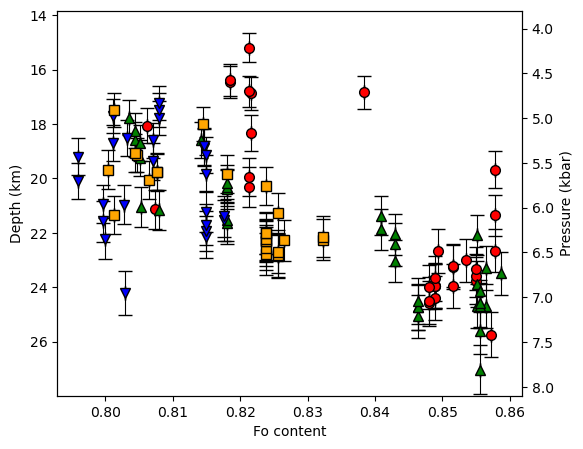

In [10]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))


ms=7
# This plots a symbol with its error bar for sample 0
ax1.errorbar(data['Fo'].loc[sam0], 
             MC_Av['SingleFI_D_km'].loc[sam0],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam0],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=ms, mec='k', capsize=5)

# This plots a symbol with its error bar for sample 1
ax1.errorbar(data['Fo'].loc[sam1], 
             MC_Av['SingleFI_D_km'].loc[sam1],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam1],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='green', ms=ms, mec='k', capsize=5)

# This plots a symbol with its error bar for sample 4
ax1.errorbar(data['Fo'].loc[sam4], 
             MC_Av['SingleFI_D_km'].loc[sam4],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam4],
             fmt='v', ecolor='k', elinewidth=0.8, mfc='blue', ms=ms, mec='k', capsize=5)

# This plots a symbol with its error bar for sample 6
ax1.errorbar(data['Fo'].loc[sam6], 
             MC_Av['SingleFI_D_km'].loc[sam6],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam6],
             fmt='s', ecolor='k', elinewidth=0.8, mfc='orange', ms=ms, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax1.set_ylabel('Depth (km)')
ax1.invert_yaxis()
ax2=ax1.twinx()
ax2.invert_yaxis()
# This sets the range of pressures you want
Plim1=3.8
Plim2=8.1
ax2.set_ylim([Plim2, Plim1])
# This calculates the corresponding depths for those pressures. 
D_Plim1=pf.convert_pressure_depth_2step(P_kbar=Plim1, d1=14, rho1=2800, rho2=3100, g=9.81)
D_Plim2=pf.convert_pressure_depth_2step(P_kbar=Plim2, d1=14, rho1=2800, rho2=3100, g=9.81)
ax1.set_ylim([D_Plim2, D_Plim1])
ax2.set_ylabel('Pressure (kbar)')

## Complex double axis aligning
- The plot above was relatively easy, because we were always working below the density transition from layer 1 to layer 2
- Be careful - if your density transition lies in the range, showing the axes is very complicated! 
- One option is presented here. 
https://stackoverflow.com/questions/59349185/non-linear-second-axis-in-matplotlib